In [2]:
# VERDICT Residual MLP Model Evaluation
# This notebook evaluates the trained Residual MLP model on patient brain data

import nibabel as nib
import numpy as np
import torch
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Import Residual MLP model
from models.residual_mlp import ResidualMLPRegressor

# Load the Patient8 NIfTI file
Patient8_img = nib.load(r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient08\Patient08_mc_normb0.nii.gz')
Patient8_data = Patient8_img.get_fdata()

print("=== Loading Patient8_data ===")
print(f"Loaded brain data shape: {Patient8_data.shape}")
print(f"Data type: {Patient8_data.dtype}")

=== Loading Patient8_data ===
Loaded brain data shape: (112, 112, 60, 153)
Data type: float64


In [3]:
# Examine Patient08_ROIs_to_DWI_small.nii file
print("=== Examining Patient08_ROIs_to_DWI_small.nii ===")

# Load the ROI file
Patient8_roi_path = r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient08\Patient08_ROIs_to_DWI_small.nii'
Patient8_roi_img = nib.load(Patient8_roi_path)
Patient8_roi_data = Patient8_roi_img.get_fdata()

print(f"ROI file path: {Patient8_roi_path}")
print(f"ROI data shape: {Patient8_roi_data.shape}")
print(f"ROI data type: {Patient8_roi_data.dtype}")
print(f"ROI data range: [{Patient8_roi_data.min():.1f}, {Patient8_roi_data.max():.1f}]")

# Check unique values in the ROI
unique_values = np.unique(Patient8_roi_data)
print(f"Number of unique values: {len(unique_values)}")
print(f"Unique values: {unique_values}")

# Count voxels for each ROI value
print("\nROI Value Distribution:")
for val in unique_values:
    count = np.sum(Patient8_roi_data == val)
    percentage = (count / Patient8_roi_data.size) * 100
    print(f"  Value {val:3.0f}: {count:8,} voxels ({percentage:5.2f}%)")

# Check if dimensions match the brain data
print(f"\nDimension comparison:")
print(f"Brain data shape: {Patient8_data.shape}")
print(f"ROI data shape:   {Patient8_roi_data.shape}")
print(f"Dimensions match: {Patient8_roi_data.shape[:3] == Patient8_data.shape[:3]}")

=== Examining Patient08_ROIs_to_DWI_small.nii ===
ROI file path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient08\Patient08_ROIs_to_DWI_small.nii
ROI data shape: (112, 112, 60)
ROI data type: float64
ROI data range: [0.0, 2.0]
Number of unique values: 3
Unique values: [0. 1. 2.]

ROI Value Distribution:
  Value   0:  752,486 voxels (99.98%)
  Value   1:      104 voxels ( 0.01%)
  Value   2:       50 voxels ( 0.01%)

Dimension comparison:
Brain data shape: (112, 112, 60, 153)
ROI data shape:   (112, 112, 60)
Dimensions match: True


In [4]:
# Load the Patient05 NIfTI file
Patient5_img = nib.load(r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient05\Patient05_mc_normb0.nii.gz')
Patient5_data = Patient5_img.get_fdata()
print("=== Loading Patient5_data ===")
print(f"Loaded brain data shape: {Patient5_data.shape}")
print(f"Data type: {Patient5_data.dtype}")

=== Loading Patient5_data ===
Loaded brain data shape: (112, 112, 60, 153)
Data type: float64


In [5]:
# Examine Patient05_ROIs_to_DWI_small.nii file
print("=== Examining Patient05_ROIs_to_DWI_small.nii ===")

# Load the ROI file
Patient5_roi_path = r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient05\Patient05_ROIs_to_DWI_small.nii.gz'
Patient5_roi_img = nib.load(Patient5_roi_path)
Patient5_roi_data = Patient5_roi_img.get_fdata()

print(f"ROI file path: {Patient5_roi_path}")
print(f"ROI data shape: {Patient5_roi_data.shape}")
print(f"ROI data type: {Patient5_roi_data.dtype}")
print(f"ROI data range: [{Patient5_roi_data.min():.1f}, {Patient5_roi_data.max():.1f}]")

# Check unique values in the ROI
unique_values = np.unique(Patient5_roi_data)
print(f"Number of unique values: {len(unique_values)}")
print(f"Unique values: {unique_values}")

# Count voxels for each ROI value
print("\nROI Value Distribution:")
for val in unique_values:
    count = np.sum(Patient5_roi_data == val)
    percentage = (count / Patient5_roi_data.size) * 100
    print(f"  Value {val:3.0f}: {count:8,} voxels ({percentage:5.2f}%)")

# Check if dimensions match the brain data
print(f"\nDimension comparison:")
print(f"Brain data shape: {Patient5_data.shape}")
print(f"ROI data shape:   {Patient5_roi_data.shape}")
print(f"Dimensions match: {Patient5_roi_data.shape[:3] == Patient5_data.shape[:3]}")

=== Examining Patient05_ROIs_to_DWI_small.nii ===
ROI file path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient05\Patient05_ROIs_to_DWI_small.nii.gz
ROI data shape: (112, 112, 60)
ROI data type: float64
ROI data range: [0.0, 2.0]
Number of unique values: 3
Unique values: [0. 1. 2.]

ROI Value Distribution:
  Value   0:  746,436 voxels (99.18%)
  Value   1:        2 voxels ( 0.00%)
  Value   2:    6,202 voxels ( 0.82%)

Dimension comparison:
Brain data shape: (112, 112, 60, 153)
ROI data shape:   (112, 112, 60)
Dimensions match: True


In [6]:
# Load the Patient12 NIfTI file
Patient12_img = nib.load(r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient12\Patient12_mc_normb0.nii.gz')
Patient12_data = Patient12_img.get_fdata()
print("=== Loading Patient12_data ===")
print(f"Loaded brain data shape: {Patient12_data.shape}")
print(f"Data type: {Patient12_data.dtype}")

=== Loading Patient12_data ===
Loaded brain data shape: (112, 112, 60, 153)
Data type: float64


In [7]:
# Examine Patient12_ROIs_to_DWI_small.nii file
print("=== Examining Patient12_ROIs_to_DWI_small.nii ===")
# Load the ROI file
Patient12_roi_path = r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient12\Patient12_ROIs_to_DWI_small.nii.gz'
Patient12_roi_img = nib.load(Patient12_roi_path)
Patient12_roi_data = Patient12_roi_img.get_fdata()
print(f"ROI file path: {Patient12_roi_path}")
print(f"ROI data shape: {Patient12_roi_data.shape}")
print(f"ROI data type: {Patient12_roi_data.dtype}")
print(f"ROI data range: [{Patient12_roi_data.min():.1f}, {Patient12_roi_data.max():.1f}]")
# Check unique values in the ROI
unique_values = np.unique(Patient12_roi_data)
print(f"Number of unique values: {len(unique_values)}")
print(f"Unique values: {unique_values}")
# Count voxels for each ROI value
print("\nROI Value Distribution:")
for val in unique_values:
    count = np.sum(Patient12_roi_data == val)
    percentage = (count / Patient12_roi_data.size) * 100
    print(f"  Value {val:3.0f}: {count:8,} voxels ({percentage:5.2f}%)")
# Check if dimensions match the brain data
print(f"\nDimension comparison:")
print(f"Brain data shape: {Patient12_data.shape}")
print(f"ROI data shape:   {Patient12_roi_data.shape}")
print(f"Dimensions match: {Patient12_roi_data.shape[:3] == Patient12_data.shape[:3]}")

=== Examining Patient12_ROIs_to_DWI_small.nii ===
ROI file path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient12\Patient12_ROIs_to_DWI_small.nii.gz
ROI data shape: (112, 112, 60)
ROI data type: float64
ROI data range: [0.0, 2.0]
Number of unique values: 3
Unique values: [0. 1. 2.]

ROI Value Distribution:
  Value   0:  750,804 voxels (99.76%)
  Value   1:    1,230 voxels ( 0.16%)
  Value   2:      606 voxels ( 0.08%)

Dimension comparison:
Brain data shape: (112, 112, 60, 153)
ROI data shape:   (112, 112, 60)
Dimensions match: True


In [8]:
# Load MLP model and scaler for inference
import yaml
from importlib import import_module

def load_mlp_model(checkpoint_dir, config_path):
    # Load configuration from yaml
    print("Loading MLP configuration from mlp.yaml...")
    with open(config_path, 'r', encoding='utf-8') as f:
        config = yaml.safe_load(f)
    
    print(f"Model type: {config['model']['type']}")
    print(f"Model class: {config['model']['class_name']}")
    print(f"Model params: {config['model']['params']}")
    
    # Import model class dynamically
    module = import_module(f"models.{config['model']['type']}")
    Model = getattr(module, config['model']['class_name'])
    
    # Create model with configuration parameters
    model = Model(
        input_dim=153,  # Signal volumes
        output_dim=8,   # VERDICT parameters
        **config['model']['params']
    )
    
    # Load model weights
    model_path = os.path.join(checkpoint_dir, 'mlp_best.pt')
    if os.path.exists(model_path):
        state_dict = torch.load(model_path, map_location='cpu', weights_only=True)
        model.load_state_dict(state_dict)
        model.eval()
        print("✓ Loaded MLP model successfully")
    else:
        raise FileNotFoundError(f"Model file not found: {model_path}")
    
    # Load scaler
    scaler_path = os.path.join(checkpoint_dir, 'mlp_scaler.pkl')
    if os.path.exists(scaler_path):
        with open(scaler_path, 'rb') as f:
            scaler = pickle.load(f)
        print("✓ Loaded MLP scaler successfully")
    else:
        raise FileNotFoundError(f"Scaler file not found: {scaler_path}")
    
    return model, scaler, config

# Define paths
checkpoint_dir = r'd:\AiProjects\verdict_benchmark\checkpoints'
config_path = r'd:\AiProjects\verdict_benchmark\configs\mlp.yaml'

# Load the MLP model and scaler
mlp_model, mlp_scaler, mlp_config = load_mlp_model(checkpoint_dir, config_path)
print(f"Model parameters: {sum(p.numel() for p in mlp_model.parameters()):,}")
print(f"Configuration loaded from: {mlp_config.get('wandb_run_name', 'mlp_official')}")

# Define VERDICT parameter names
param_names = ['fic', 'fee', 'Dic', 'R', 'Dpar', 'Dtra', 'theta', 'phi']

Loading MLP configuration from mlp.yaml...
Model type: mlp
Model class: MLPRegressor
Model params: {'hidden_dims': [150, 150, 150], 'activation': 'relu'}
✓ Loaded MLP model successfully
✓ Loaded MLP scaler successfully
Model parameters: 69,608
Configuration loaded from: mlp_official


In [9]:
# Extract tumor signals from all patients
print("=" * 80)
print(" EXTRACTING TUMOR SIGNALS FROM ALL PATIENTS")
print("=" * 80)

# Store all patient data and ROI data
patients_data = {
    'Patient05': {'brain_data': Patient5_data, 'roi_data': Patient5_roi_data},
    'Patient08': {'brain_data': Patient8_data, 'roi_data': Patient8_roi_data},
    'Patient12': {'brain_data': Patient12_data, 'roi_data': Patient12_roi_data}
}

# Extract tumor signals for each patient
all_tumor_signals = {}
all_tumor_regions = {}

for patient_name, data_dict in patients_data.items():
    print(f"\nProcessing {patient_name}:")
    brain_data = data_dict['brain_data']
    roi_data = data_dict['roi_data']
    
    patient_tumor_signals = {}
    patient_tumor_regions = {}
    
    # Extract signals for ROI values 1 and 2 (tumor regions)
    for roi_val in [1, 2]:
        roi_mask = roi_data == roi_val
        if np.any(roi_mask):
            # Get 3D coordinates of tumor voxels
            tumor_coords = np.where(roi_mask)
            
            # Extract signal from tumor region
            tumor_signal = brain_data[roi_mask]  # Shape: (n_tumor_voxels, 153)
            
            # Store results
            tumor_key = f'{patient_name}_Tumor_{roi_val}'
            patient_tumor_signals[tumor_key] = tumor_signal
            patient_tumor_regions[tumor_key] = roi_mask
            
            print(f"   Tumor Region {roi_val}:")
            print(f"     Voxels: {tumor_signal.shape[0]}")
            print(f"     Location: X[{tumor_coords[0].min()}-{tumor_coords[0].max()}], "
                  f"Y[{tumor_coords[1].min()}-{tumor_coords[1].max()}], "
                  f"Z[{tumor_coords[2].min()}-{tumor_coords[2].max()}]")
            print(f"     Centroid: ({tumor_coords[0].mean():.1f}, {tumor_coords[1].mean():.1f}, {tumor_coords[2].mean():.1f})")
            print(f"     Signal range: [{tumor_signal.min():.3f}, {tumor_signal.max():.3f}]")
        else:
            print(f"   Tumor Region {roi_val}: No tumor found")
    
    # Store in global dictionaries
    all_tumor_signals.update(patient_tumor_signals)
    all_tumor_regions.update(patient_tumor_regions)

print(f"\nExtracted signals from {len(all_tumor_signals)} tumor regions across {len(patients_data)} patients")
print(f"Tumor regions found: {list(all_tumor_signals.keys())}")

 EXTRACTING TUMOR SIGNALS FROM ALL PATIENTS

Processing Patient05:
   Tumor Region 1:
     Voxels: 2
     Location: X[73-73], Y[39-40], Z[23-23]
     Centroid: (73.0, 39.5, 23.0)
     Signal range: [0.031, 1.025]
   Tumor Region 2:
     Voxels: 6202
     Location: X[61-86], Y[23-60], Z[17-48]
     Centroid: (71.9, 39.5, 32.0)
     Signal range: [0.000, 1.100]

Processing Patient08:
   Tumor Region 1:
     Voxels: 104
     Location: X[69-77], Y[13-26], Z[23-31]
     Centroid: (73.8, 18.6, 26.5)
     Signal range: [0.008, 1.071]
   Tumor Region 2:
     Voxels: 50
     Location: X[65-77], Y[9-28], Z[20-34]
     Centroid: (69.8, 21.5, 29.3)
     Signal range: [0.004, 1.161]

Processing Patient12:
   Tumor Region 1:
     Voxels: 1230
     Location: X[64-81], Y[47-66], Z[25-42]
     Centroid: (72.8, 56.6, 33.1)
     Signal range: [0.001, 1.142]
   Tumor Region 2:
     Voxels: 606
     Location: X[58-81], Y[35-75], Z[21-45]
     Centroid: (70.1, 55.5, 34.1)
     Signal range: [0.000, 1.136]



In [10]:
# RUN MLP INFERENCE ON ALL TUMOR REGIONS
print("\nRUNNING MLP INFERENCE ON ALL TUMOR REGIONS")
print("-" * 80)

# Process each tumor region
all_tumor_predictions = {}
all_tumor_verdict_params = {}

for tumor_name, tumor_signal in all_tumor_signals.items():
    print(f"\nProcessing {tumor_name}:")
    print(f"   Tumor voxels: {tumor_signal.shape[0]}")
    
    # Run MLP inference on tumor voxels
    with torch.no_grad():
        tumor_tensor = torch.FloatTensor(tumor_signal)
        tumor_pred_scaled = mlp_model(tumor_tensor)
        tumor_pred_p1_p8 = mlp_scaler.inverse_transform(tumor_pred_scaled.numpy())
    
    # Transform to actual VERDICT parameters
    tumor_verdict = np.zeros_like(tumor_pred_p1_p8)
    
    # Apply VERDICT parameter transformations
    tumor_verdict[:, 0] = np.cos(tumor_pred_p1_p8[:, 0])**2                    # fic
    tumor_verdict[:, 1] = (1 - np.cos(tumor_pred_p1_p8[:, 0])**2) * np.cos(tumor_pred_p1_p8[:, 1])**2  # fee
    tumor_verdict[:, 2] = tumor_pred_p1_p8[:, 2]                              # Dic
    tumor_verdict[:, 3] = tumor_pred_p1_p8[:, 3]                              # R
    tumor_verdict[:, 4] = tumor_pred_p1_p8[:, 4]                              # Dpar
    tumor_verdict[:, 5] = tumor_pred_p1_p8[:, 5] * tumor_pred_p1_p8[:, 4]     # Dtra
    tumor_verdict[:, 6] = tumor_pred_p1_p8[:, 6]                              # theta
    tumor_verdict[:, 7] = tumor_pred_p1_p8[:, 7]                              # phi
    
    # Store results
    all_tumor_predictions[tumor_name] = tumor_pred_p1_p8
    all_tumor_verdict_params[tumor_name] = tumor_verdict
    
    print(f"   VERDICT parameters estimated.")
    print(f"   Parameter range: [{tumor_verdict.min():.6f}, {tumor_verdict.max():.6f}]")

print(f"\nSuccessfully processed {len(all_tumor_verdict_params)} tumor regions.")
print("Ready for multi-patient tumor analysis")

# Calculate tumor statistics for all patients and parameters
all_tumor_stats = {}
for tumor_name, verdict_params in all_tumor_verdict_params.items():
    all_tumor_stats[tumor_name] = {}
    for i, param_name in enumerate(param_names):
        all_tumor_stats[tumor_name][param_name] = {
            'mean': verdict_params[:, i].mean(),
            'std': verdict_params[:, i].std(),
            'min': verdict_params[:, i].min(),
            'max': verdict_params[:, i].max(),
            'median': np.median(verdict_params[:, i])
        }

print(f"Tumor statistics calculated for all {len(param_names)} parameters across {len(patients_data)} patients")


RUNNING MLP INFERENCE ON ALL TUMOR REGIONS
--------------------------------------------------------------------------------

Processing Patient05_Tumor_1:
   Tumor voxels: 2
   VERDICT parameters estimated.
   Parameter range: [0.000000, 2.286077]

Processing Patient05_Tumor_2:
   Tumor voxels: 6202
   VERDICT parameters estimated.
   Parameter range: [0.000000, 2.820619]

Processing Patient08_Tumor_1:
   Tumor voxels: 104
   VERDICT parameters estimated.
   Parameter range: [0.000000, 2.573478]

Processing Patient08_Tumor_2:
   Tumor voxels: 50
   VERDICT parameters estimated.
   Parameter range: [0.000000, 2.324404]

Processing Patient12_Tumor_1:
   Tumor voxels: 1230
   VERDICT parameters estimated.
   Parameter range: [-0.000002, 2.615777]

Processing Patient12_Tumor_2:
   Tumor voxels: 606
   VERDICT parameters estimated.
   Parameter range: [0.000000, 2.636756]

Successfully processed 6 tumor regions.
Ready for multi-patient tumor analysis
Tumor statistics calculated for all 8 p

MULTI-PATIENT CLINICAL ASSESSMENT SUMMARY


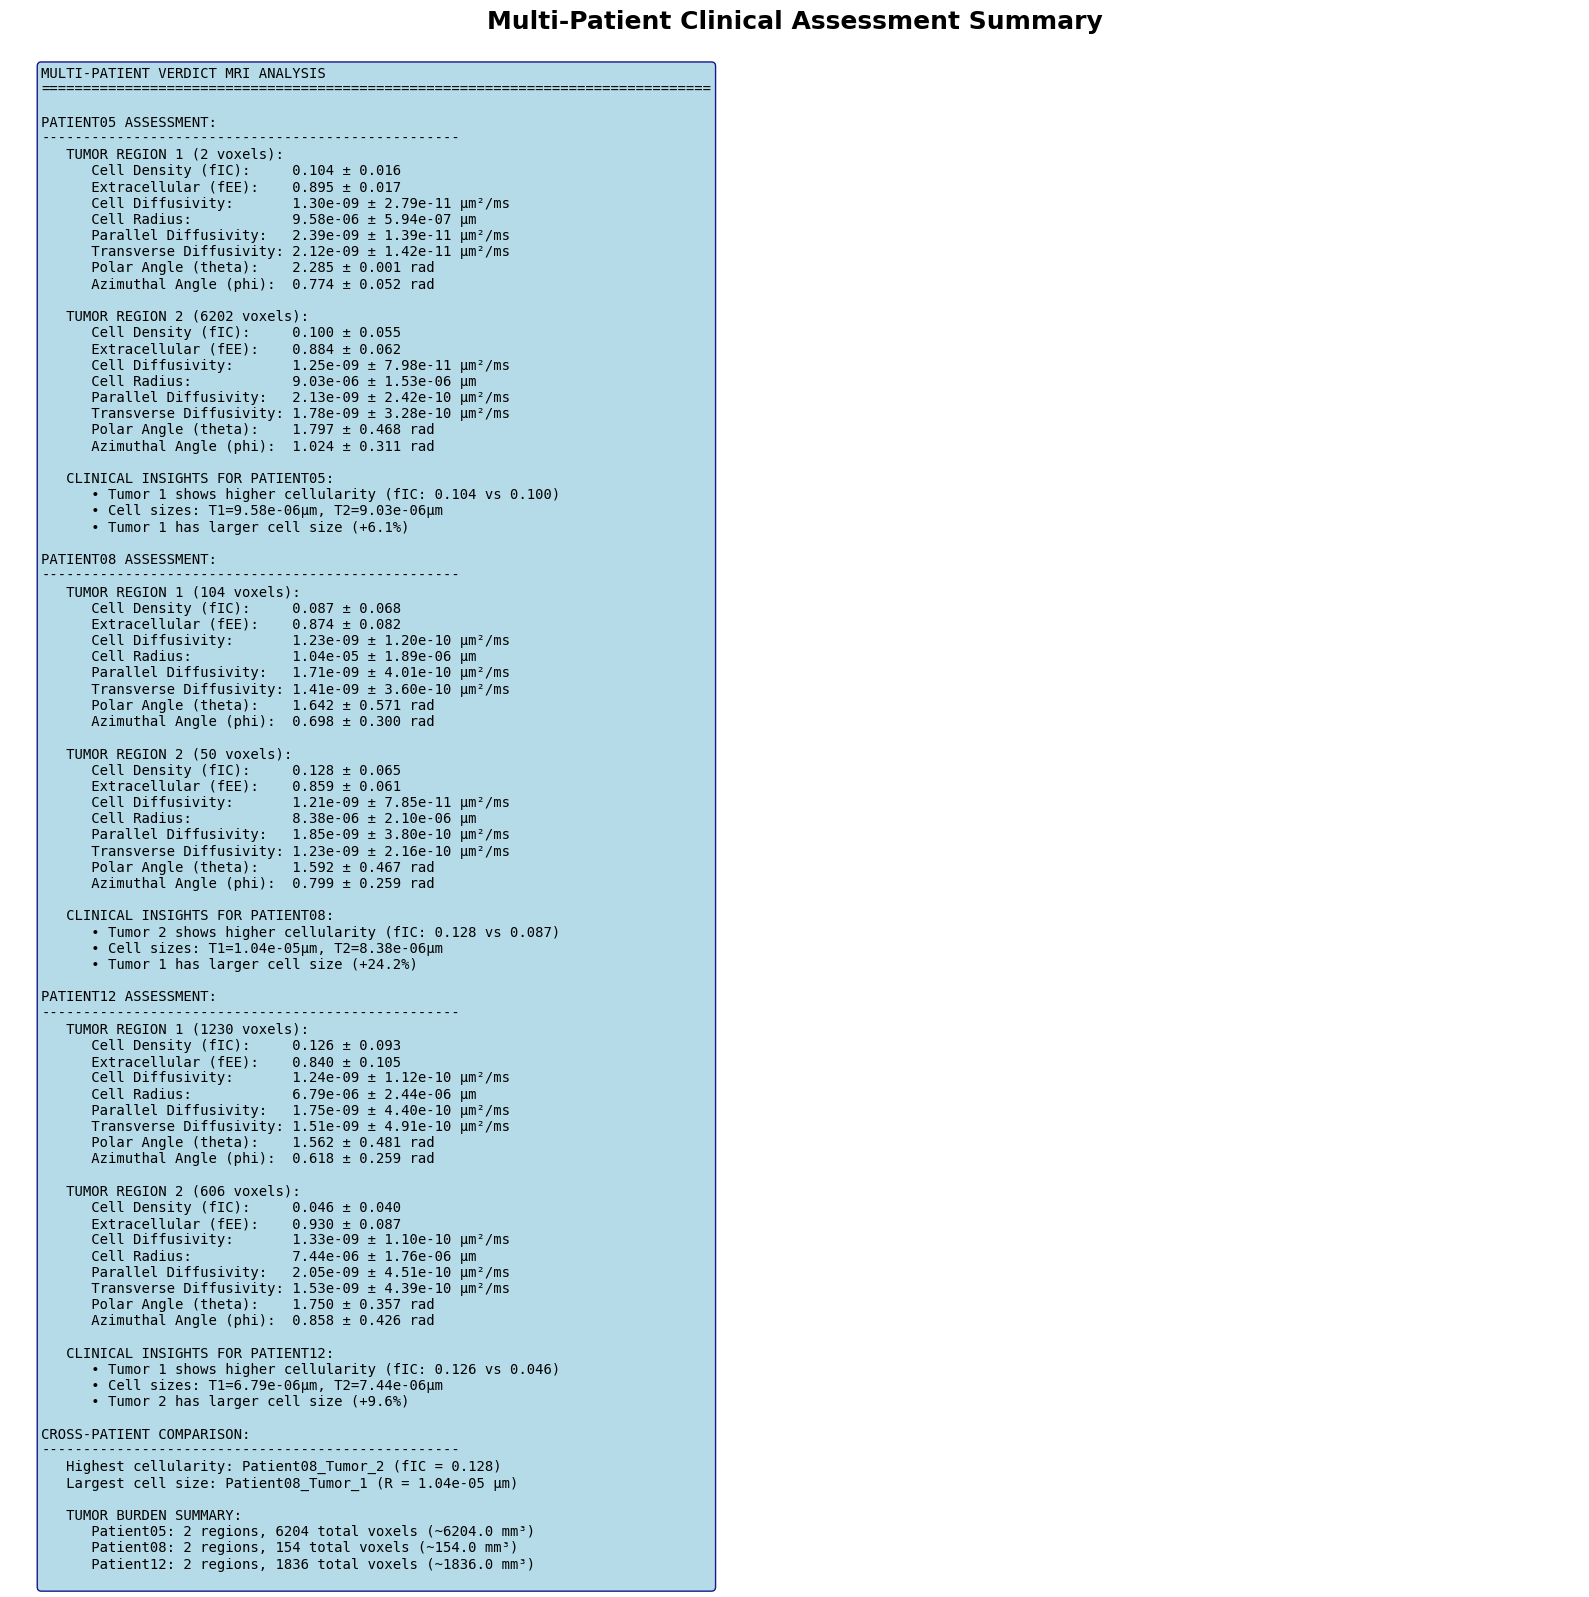


MULTI-PATIENT VERDICT MRI ANALYSIS

PATIENT05 ASSESSMENT:
--------------------------------------------------
   TUMOR REGION 1 (2 voxels):
      Cell Density (fIC):     0.104 ± 0.016
      Extracellular (fEE):    0.895 ± 0.017
      Cell Diffusivity:       1.30e-09 ± 2.79e-11 μm²/ms
      Cell Radius:            9.58e-06 ± 5.94e-07 μm
      Parallel Diffusivity:   2.39e-09 ± 1.39e-11 μm²/ms
      Transverse Diffusivity: 2.12e-09 ± 1.42e-11 μm²/ms
      Polar Angle (theta):    2.285 ± 0.001 rad
      Azimuthal Angle (phi):  0.774 ± 0.052 rad

   TUMOR REGION 2 (6202 voxels):
      Cell Density (fIC):     0.100 ± 0.055
      Extracellular (fEE):    0.884 ± 0.062
      Cell Diffusivity:       1.25e-09 ± 7.98e-11 μm²/ms
      Cell Radius:            9.03e-06 ± 1.53e-06 μm
      Parallel Diffusivity:   2.13e-09 ± 2.42e-10 μm²/ms
      Transverse Diffusivity: 1.78e-09 ± 3.28e-10 μm²/ms
      Polar Angle (theta):    1.797 ± 0.468 rad
      Azimuthal Angle (phi):  1.024 ± 0.311 rad

   CLINIC

In [11]:
# COMPREHENSIVE CLINICAL ASSESSMENT SUMMARY
print("MULTI-PATIENT CLINICAL ASSESSMENT SUMMARY")
print("=" * 80)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.axis('off')

# Create comprehensive summary text
summary_text = "MULTI-PATIENT VERDICT MRI ANALYSIS\n" + "="*80 + "\n\n"

# Group results by patient
patients_summary = {}
for patient_name in ['Patient05', 'Patient08', 'Patient12']:
    patients_summary[patient_name] = {}
    for tumor_name, stats in all_tumor_stats.items():
        if patient_name in tumor_name:
            tumor_num = tumor_name.split('_')[-1]
            patients_summary[patient_name][f'Tumor_{tumor_num}'] = {
                'tumor_name': tumor_name,
                'stats': stats,
                'voxel_count': all_tumor_verdict_params[tumor_name].shape[0]
            }

# Generate summary for each patient
for patient_name, patient_data in patients_summary.items():
    summary_text += f"{patient_name.upper()} ASSESSMENT:\n"
    summary_text += f"{'-'*50}\n"
    
    if not patient_data:
        summary_text += "   No tumor regions detected\n\n"
        continue
    
    for tumor_key, tumor_info in patient_data.items():
        tumor_num = tumor_key.split('_')[1]
        stats = tumor_info['stats']
        voxel_count = tumor_info['voxel_count']
        
        summary_text += f"   TUMOR REGION {tumor_num} ({voxel_count} voxels):\n"
        summary_text += f"      Cell Density (fIC):     {stats['fic']['mean']:.3f} ± {stats['fic']['std']:.3f}\n"
        summary_text += f"      Extracellular (fEE):    {stats['fee']['mean']:.3f} ± {stats['fee']['std']:.3f}\n"
        summary_text += f"      Cell Diffusivity:       {stats['Dic']['mean']:.2e} ± {stats['Dic']['std']:.2e} μm²/ms\n"
        summary_text += f"      Cell Radius:            {stats['R']['mean']:.2e} ± {stats['R']['std']:.2e} μm\n"
        summary_text += f"      Parallel Diffusivity:   {stats['Dpar']['mean']:.2e} ± {stats['Dpar']['std']:.2e} μm²/ms\n"
        summary_text += f"      Transverse Diffusivity: {stats['Dtra']['mean']:.2e} ± {stats['Dtra']['std']:.2e} μm²/ms\n"
        summary_text += f"      Polar Angle (theta):    {stats['theta']['mean']:.3f} ± {stats['theta']['std']:.3f} rad\n"
        summary_text += f"      Azimuthal Angle (phi):  {stats['phi']['mean']:.3f} ± {stats['phi']['std']:.3f} rad\n\n"
    
    # Add patient-specific clinical insights
    if len(patient_data) == 2:  # Both tumors present
        tumor1_fic = patient_data['Tumor_1']['stats']['fic']['mean']
        tumor2_fic = patient_data['Tumor_2']['stats']['fic']['mean']
        
        summary_text += f"   CLINICAL INSIGHTS FOR {patient_name.upper()}:\n"
        if tumor1_fic > tumor2_fic:
            summary_text += f"      • Tumor 1 shows higher cellularity (fIC: {tumor1_fic:.3f} vs {tumor2_fic:.3f})\n"
        else:
            summary_text += f"      • Tumor 2 shows higher cellularity (fIC: {tumor2_fic:.3f} vs {tumor1_fic:.3f})\n"
        
        tumor1_r = patient_data['Tumor_1']['stats']['R']['mean']
        tumor2_r = patient_data['Tumor_2']['stats']['R']['mean']
        summary_text += f"      • Cell sizes: T1={tumor1_r:.2e}μm, T2={tumor2_r:.2e}μm\n"
        
        if tumor1_r > tumor2_r:
            summary_text += f"      • Tumor 1 has larger cell size (+{((tumor1_r/tumor2_r-1)*100):.1f}%)\n"
        else:
            summary_text += f"      • Tumor 2 has larger cell size (+{((tumor2_r/tumor1_r-1)*100):.1f}%)\n"
    
    summary_text += "\n"

# Add cross-patient comparison
summary_text += f"CROSS-PATIENT COMPARISON:\n"
summary_text += f"{'-'*50}\n"

# Find highest cellularity across all patients
max_fic = 0
max_fic_tumor = ""
for tumor_name, stats in all_tumor_stats.items():
    if stats['fic']['mean'] > max_fic:
        max_fic = stats['fic']['mean']
        max_fic_tumor = tumor_name

summary_text += f"   Highest cellularity: {max_fic_tumor} (fIC = {max_fic:.3f})\n"

# Find largest cell size
max_r = 0
max_r_tumor = ""
for tumor_name, stats in all_tumor_stats.items():
    if stats['R']['mean'] > max_r:
        max_r = stats['R']['mean']
        max_r_tumor = tumor_name

summary_text += f"   Largest cell size: {max_r_tumor} (R = {max_r:.2e} μm)\n"

# Calculate total tumor burden per patient
summary_text += f"\n   TUMOR BURDEN SUMMARY:\n"
for patient_name in ['Patient05', 'Patient08', 'Patient12']:
    total_voxels = 0
    tumor_count = 0
    for tumor_name in all_tumor_stats.keys():
        if patient_name in tumor_name:
            total_voxels += all_tumor_verdict_params[tumor_name].shape[0]
            tumor_count += 1
    
    if tumor_count > 0:
        summary_text += f"      {patient_name}: {tumor_count} regions, {total_voxels} total voxels (~{total_voxels:.1f} mm³)\n"
    else:
        summary_text += f"      {patient_name}: No tumor regions detected\n"

ax.text(0.02, 0.98, summary_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9, edgecolor='navy'))

plt.title('Multi-Patient Clinical Assessment Summary', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print summary to console as well
print("\n" + summary_text)

In [12]:
# CREATE PARAMETER MAPS FOR BRAIN'S CENTRAL SLICE WITH TUMOR VISUALIZATION
print("CREATING PARAMETER MAPS FOR CENTRAL BRAIN SLICES")
print("=" * 80)

from scipy import ndimage
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as patches

# Function to create parameter maps for a patient
def create_patient_parameter_maps(patient_name, brain_data, roi_data, tumor_verdict_params, tumor_regions):
    """Create parameter maps for central slice of a patient's brain"""
    
    # Find central slice (middle of Z dimension)
    central_slice = brain_data.shape[2] // 2
    print(f"\nProcessing {patient_name} - Central slice: {central_slice}")
    
    # Get brain slice (b=0 image)
    brain_slice = brain_data[:, :, central_slice, 0].T
    
    # Create parameter maps for this slice
    param_maps = {}
    tumor_overlays = {}
    
    # Initialize parameter maps with NaN (will show as transparent/white)
    for param_name in param_names:
        param_maps[param_name] = np.full_like(brain_slice, np.nan)
    
    # Fill in parameter values for tumor regions in this slice
    for tumor_name, roi_mask in tumor_regions.items():
        if patient_name in tumor_name:
            tumor_slice_mask = roi_mask[:, :, central_slice].T
            
            if np.any(tumor_slice_mask):
                # Get VERDICT parameters for this tumor
                verdict_params = tumor_verdict_params[tumor_name]
                
                # Get coordinates of tumor pixels in this slice
                tumor_coords_2d = np.where(tumor_slice_mask)
                
                # Get corresponding 3D coordinates in the full volume
                tumor_coords_3d = np.where(roi_mask)
                slice_indices = tumor_coords_3d[2] == central_slice
                
                if np.any(slice_indices):
                    # Get parameter values for voxels in this slice
                    slice_verdict_params = verdict_params[slice_indices]
                    
                    # Get 2D coordinates for tumor voxels in this slice
                    tumor_coords_slice = np.where(tumor_slice_mask)
                    
                    # Fill parameter maps with actual voxel-wise values
                    for i, param_name in enumerate(param_names):
                        param_values = slice_verdict_params[:, i]
                        # Assign actual parameter values to corresponding pixels
                        for j, (y, x) in enumerate(zip(tumor_coords_slice[0], tumor_coords_slice[1])):
                            if j < len(param_values):  # Safety check
                                param_maps[param_name][y, x] = param_values[j]
                    
                    # Store tumor overlay
                    tumor_num = tumor_name.split('_')[-1]
                    tumor_overlays[f'Tumor_{tumor_num}'] = tumor_slice_mask
    
    return brain_slice, param_maps, tumor_overlays, central_slice

# Process all patients
patient_brain_slices = {}
patient_param_maps = {}
patient_tumor_overlays = {}
patient_central_slices = {}

for patient_name, data_dict in patients_data.items():
    brain_data = data_dict['brain_data']
    roi_data = data_dict['roi_data']
    
    # Get tumor verdict parameters for this patient
    patient_tumor_verdict = {}
    patient_tumor_regions = {}
    
    for tumor_name, verdict_params in all_tumor_verdict_params.items():
        if patient_name in tumor_name:
            patient_tumor_verdict[tumor_name] = verdict_params
            patient_tumor_regions[tumor_name] = all_tumor_regions[tumor_name]
    
    # Create parameter maps
    brain_slice, param_maps, tumor_overlays, central_slice = create_patient_parameter_maps(
        patient_name, brain_data, roi_data, patient_tumor_verdict, patient_tumor_regions
    )
    
    # Store results
    patient_brain_slices[patient_name] = brain_slice
    patient_param_maps[patient_name] = param_maps
    patient_tumor_overlays[patient_name] = tumor_overlays
    patient_central_slices[patient_name] = central_slice

print(f"\nParameter maps created for {len(patient_brain_slices)} patients")

CREATING PARAMETER MAPS FOR CENTRAL BRAIN SLICES

Processing Patient05 - Central slice: 30

Processing Patient08 - Central slice: 30

Processing Patient12 - Central slice: 30

Parameter maps created for 3 patients


CREATING COMPREHENSIVE PARAMETER MAP VISUALIZATIONS
--------------------------------------------------------------------------------


C:\Users\yz237\AppData\Local\Temp\ipykernel_21600\2013758738.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


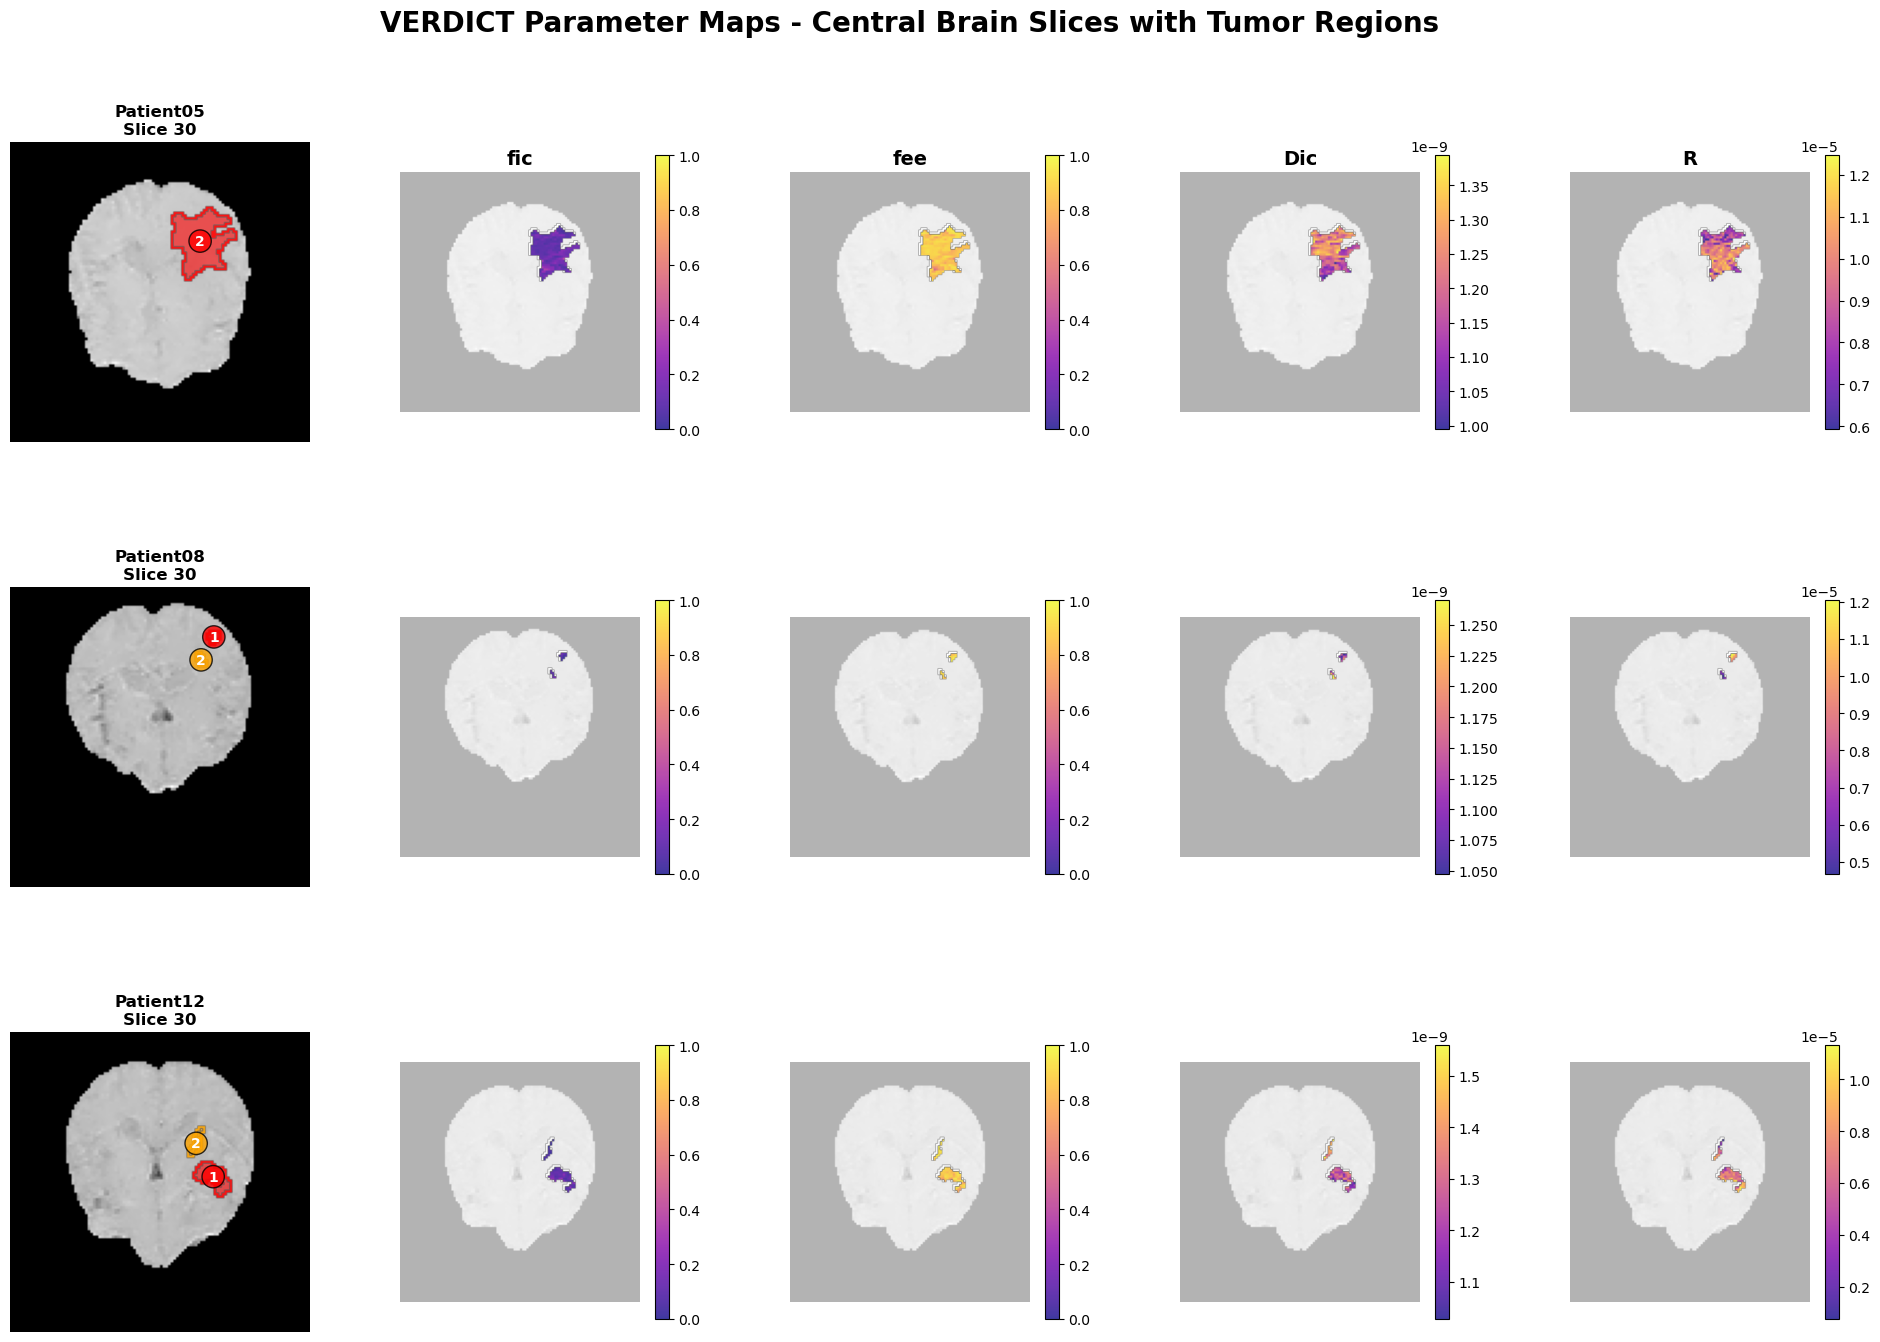

Parameter map overview completed.


In [13]:
# COMPREHENSIVE PARAMETER MAP VISUALIZATIONS
print("CREATING COMPREHENSIVE PARAMETER MAP VISUALIZATIONS")
print("-" * 80)

# 1. Create overview figure showing all patients and key parameters
fig = plt.figure(figsize=(24, 16))
fig.suptitle('VERDICT Parameter Maps - Central Brain Slices with Tumor Regions', 
             fontsize=20, fontweight='bold', y=0.95)

# Select key parameters to display (most clinically relevant)
key_params = ['fic', 'fee', 'Dic', 'R']
n_params = len(key_params)
n_patients = len(patient_brain_slices)

# Create subplot grid: patients as rows, parameters as columns, plus brain image
gs = fig.add_gridspec(n_patients, n_params + 1, hspace=0.3, wspace=0.3)

patient_names = list(patient_brain_slices.keys())

for i, patient_name in enumerate(patient_names):
    brain_slice = patient_brain_slices[patient_name]
    param_maps = patient_param_maps[patient_name]
    tumor_overlays = patient_tumor_overlays[patient_name]
    central_slice = patient_central_slices[patient_name]
    
    # Brain anatomy with tumor overlay (first column)
    ax = fig.add_subplot(gs[i, 0])
    
    # Enhance brain contrast
    brain_normalized = (brain_slice - brain_slice.min()) / (brain_slice.max() - brain_slice.min())
    brain_enhanced = np.power(brain_normalized, 0.6)
    
    ax.imshow(brain_enhanced, cmap='gray', aspect='equal', vmin=0, vmax=1)
    
    # Overlay tumor regions with distinct colors
    tumor_colors = ['red', 'orange']
    for j, (tumor_name, tumor_mask) in enumerate(tumor_overlays.items()):
        if np.any(tumor_mask):
            # Create tumor boundary
            dilated = ndimage.binary_dilation(tumor_mask, structure=np.ones((3,3)))
            boundary = dilated & ~tumor_mask
            
            # Show tumor region
            tumor_overlay = np.ma.masked_where(~tumor_mask, tumor_mask)
            boundary_overlay = np.ma.masked_where(~boundary, boundary)
            
            ax.imshow(tumor_overlay, cmap=ListedColormap([tumor_colors[j]]), 
                     alpha=0.6, aspect='equal', vmin=0, vmax=1)
            ax.imshow(boundary_overlay, cmap=ListedColormap([tumor_colors[j]]), 
                     alpha=0.9, aspect='equal', vmin=0, vmax=1)
    
    ax.set_title(f'{patient_name}\nSlice {central_slice}', fontsize=12, fontweight='bold')
    ax.axis('off')
    
    # Add tumor labels
    for j, (tumor_name, tumor_mask) in enumerate(tumor_overlays.items()):
        if np.any(tumor_mask):
            coords = np.where(tumor_mask)
            centroid_y, centroid_x = coords[0].mean(), coords[1].mean()
            ax.text(centroid_x, centroid_y, tumor_name.split('_')[1], 
                   color='white', fontsize=10, fontweight='bold', 
                   ha='center', va='center',
                   bbox=dict(boxstyle='circle', facecolor=tumor_colors[j], alpha=0.8))
    
    # Parameter maps (remaining columns)
    for j, param_name in enumerate(key_params):
        ax = fig.add_subplot(gs[i, j + 1])
        
        # Show brain anatomy as background
        ax.imshow(brain_enhanced, cmap='gray', alpha=0.3, aspect='equal', vmin=0, vmax=1)
        
        # Overlay parameter map
        param_map = param_maps[param_name]
        
        # Use plasma colormap for all parameters
        cmap = 'plasma'
        if param_name in ['fic', 'fee']:
            vmin, vmax = 0, 1
        else:
            vmin, vmax = param_map[~np.isnan(param_map)].min(), param_map[~np.isnan(param_map)].max()
        
        # Create masked array to hide NaN values
        param_masked = np.ma.masked_where(np.isnan(param_map), param_map)
        
        im = ax.imshow(param_masked, cmap=cmap, alpha=0.8, aspect='equal', 
                      vmin=vmin, vmax=vmax)
        
        # Add tumor boundaries
        for tumor_name, tumor_mask in tumor_overlays.items():
            if np.any(tumor_mask):
                boundary = ndimage.binary_dilation(tumor_mask, structure=np.ones((2,2))) & ~tumor_mask
                boundary_overlay = np.ma.masked_where(~boundary, boundary)
                ax.imshow(boundary_overlay, cmap=ListedColormap(['white']), 
                         alpha=1.0, aspect='equal', vmin=0, vmax=1)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, shrink=0.8, aspect=20)
        if param_name in ['Dic', 'R']:
            cbar.formatter.set_powerlimits((0, 0))
            cbar.update_ticks()
        
        # Set title
        if i == 0:  # Only show parameter name in top row
            ax.set_title(f'{param_name}', fontsize=14, fontweight='bold')
        
        ax.axis('off')

plt.tight_layout()
plt.show()

print("Parameter map overview completed.")

CREATING MULTI-MODEL PARAMETER MAP COMPARISON (optimized, individual colorbars)
Patient selected for visualization: Patient05
Using device: cuda
GPU: NVIDIA GeForce RTX 4080 Laptop GPU (12.0 GB)
Tumor regions: ['Patient05_Tumor_1', 'Patient05_Tumor_2']
Loading CNN: (cached thereafter)…
Loading MLP: (cached thereafter)…
Loading ResNet: (cached thereafter)…
Loading MoE: (cached thereafter)…
Loading RNN: (cached thereafter)…
Loading TabNet: (cached thereafter)…
Loading Transformer: (cached thereafter)…
Loading VAE: (cached thereafter)…
Inference complete for all models.
Global Dic range: [1.02e-09, 1.65e-09]
Global R   range: [6.02e-06, 1.60e-05]
Loading MLP: (cached thereafter)…
Loading ResNet: (cached thereafter)…
Loading MoE: (cached thereafter)…
Loading RNN: (cached thereafter)…
Loading TabNet: (cached thereafter)…
Loading Transformer: (cached thereafter)…
Loading VAE: (cached thereafter)…
Inference complete for all models.
Global Dic range: [1.02e-09, 1.65e-09]
Global R   range: [6.0

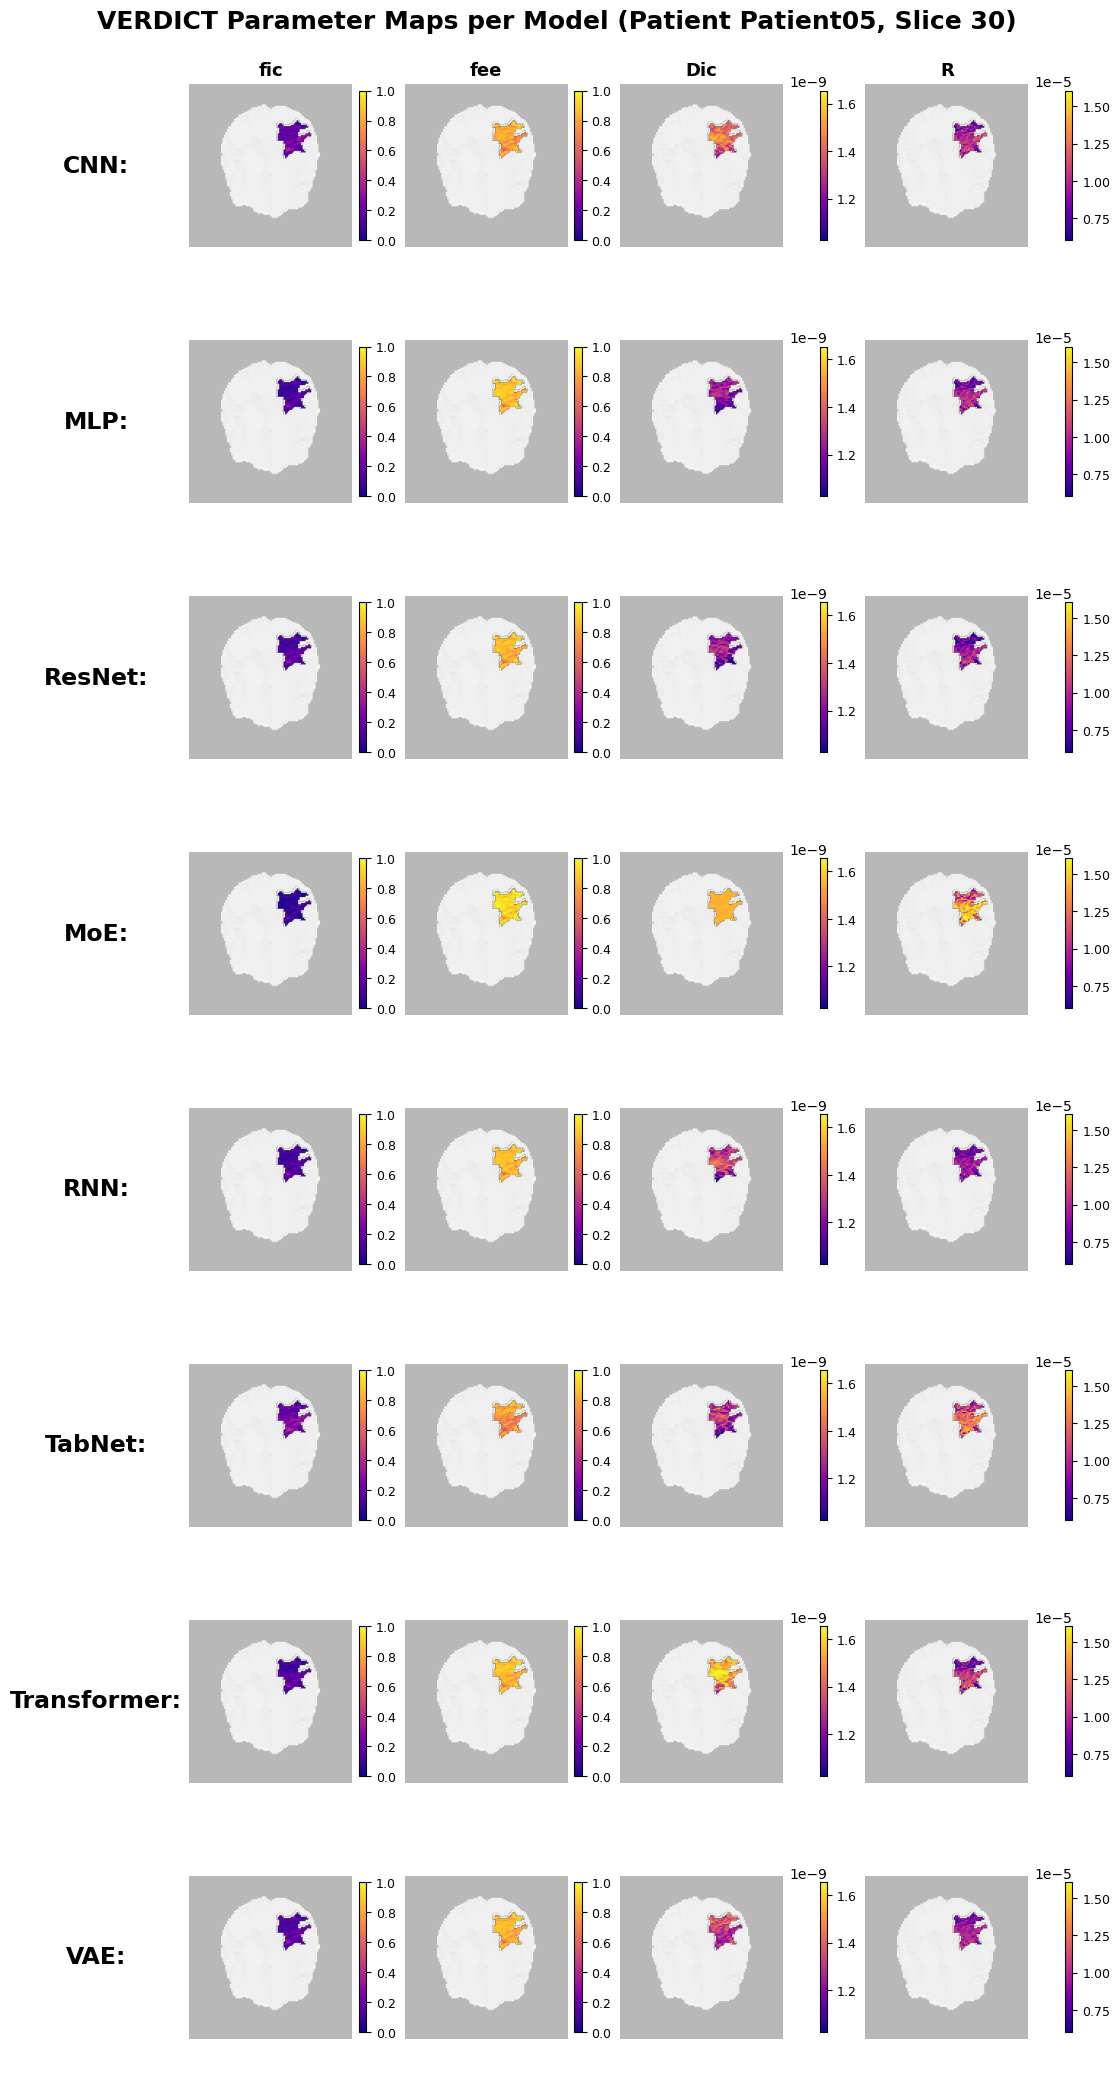

Multi-model parameter map comparison completed.


In [34]:
# MULTI-MODEL PARAMETER MAP COMPARISON (fic, fee, Dic, R) — COMPLETE & OPTIMIZED (no shared colorbars)

import os, pickle, yaml
import numpy as np
import torch
import matplotlib.pyplot as plt
from functools import lru_cache
from importlib import import_module
from scipy import ndimage
from matplotlib.colors import ListedColormap

print("CREATING MULTI-MODEL PARAMETER MAP COMPARISON (optimized, individual colorbars)")
print("=" * 90)

# -----------------------
# Config
# -----------------------
patient_of_interest = 'Patient05'  # change as needed
print(f"Patient selected for visualization: {patient_of_interest}")

model_specs = [
    {"name": "CNN:",              "config": "cnn_advanced.yaml",      "ckpt": "cnn_best.pt",              "scaler": "cnn_scaler.pkl"},
    {"name": "MLP:",              "config": "mlp.yaml",               "ckpt": "mlp_best.pt",              "scaler": "mlp_scaler.pkl"},
    {"name": "ResNet:",     "config": "residual_mlp.yaml",      "ckpt": "residual_mlp_best.pt",     "scaler": "residual_mlp_scaler.pkl"},
    {"name": "MoE:",    "config": "moe_regressor.yaml",     "ckpt": "moe_regressor_best.pt",    "scaler": "moe_regressor_scaler.pkl"},
    {"name": "RNN:",              "config": "rnn.yaml",               "ckpt": "rnn_best.pt",              "scaler": "rnn_scaler.pkl"},
    {"name": "TabNet:", "config": "tabnet_regressor.yaml",  "ckpt": "tabnet_regressor_best.pt", "scaler": "tabnet_regressor_scaler.pkl"},
    {"name": "Transformer:",      "config": "transformer.yaml",       "ckpt": "transformer_best.pt",      "scaler": "transformer_scaler.pkl"},
    {"name": "VAE:",    "config": "vae_regressor.yaml",     "ckpt": "vae_regressor_best.pt",    "scaler": "vae_regressor_scaler.pkl"},
]

checkpoints_root = r'd:\AiProjects\verdict_benchmark\checkpoints'
configs_root     = r'd:\AiProjects\verdict_benchmark\configs'

# parameter names (explicit, to avoid dependency on earlier cells)
param_names = ['fic', 'fee', 'Dic', 'R', 'Dpar', 'Dtra', 'theta', 'phi']
compare_params = ['fic', 'fee', 'Dic', 'R']
param_indices  = {p: i for i, p in enumerate(param_names)}

# GPU / device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()} "
          f"({torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB)")

# -----------------------
# Loaders & helpers
# -----------------------
@lru_cache(maxsize=None)
def load_model_generic(model_name, config_file, ckpt_file, scaler_file):
    print(f"Loading {model_name} (cached thereafter)…")
    # config
    cfg_path = os.path.join(configs_root, config_file)
    with open(cfg_path, 'r', encoding='utf-8') as f:
        cfg = yaml.safe_load(f)
    module = import_module(f"models.{cfg['model']['type']}")
    ModelCls = getattr(module, cfg['model']['class_name'])
    model = ModelCls(input_dim=153, output_dim=8, **cfg['model']['params'])

    # weights
    ckpt_path = os.path.join(checkpoints_root, ckpt_file)
    if not os.path.exists(ckpt_path):
        raise FileNotFoundError(f"Checkpoint not found: {ckpt_path}")
    state_dict = torch.load(ckpt_path, map_location=device, weights_only=True)
    model.load_state_dict(state_dict)
    model.to(device).eval()

    # scaler
    scaler_path = os.path.join(checkpoints_root, scaler_file)
    if not os.path.exists(scaler_path):
        raise FileNotFoundError(f"Scaler not found: {scaler_path}")
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    return model, scaler, cfg

def extract_primary_output(pred):
    """Return primary tensor from possible (tensor, tuple, list, dict) model outputs."""
    if isinstance(pred, (list, tuple)) and len(pred) > 0:
        pred = pred[0]
    elif isinstance(pred, dict):
        for k in ('output', 'pred', 'logits', 'recon', 'y_hat'):
            if k in pred:
                pred = pred[k]; break
    if not torch.is_tensor(pred):
        raise TypeError(f"Unsupported model output type: {type(pred)}")
    return pred

def param_transform(p):
    """Map raw model parameters to VERDICT params in your target space."""
    c0 = np.cos(p[:, 0]); c1 = np.cos(p[:, 1])
    fic  = c0**2
    fee  = (1 - fic) * (c1**2)
    Dic  = p[:, 2]
    R    = p[:, 3]
    Dpar = p[:, 4]
    Dtra = p[:, 5] * Dpar
    theta= p[:, 6]
    phi  = p[:, 7]
    return np.column_stack([fic, fee, Dic, R, Dpar, Dtra, theta, phi])

def robust_range(stack_list, lo=1, hi=99):
    """Return robust global vmin/vmax across a list of 2D arrays."""
    data = np.concatenate([np.ravel(m[~np.isnan(m)]) for m in stack_list if np.any(~np.isnan(m))]) \
           if stack_list else np.array([])
    if data.size == 0:
        return (0.0, 1.0)
    lo_v, hi_v = np.nanpercentile(data, [lo, hi])
    if not np.isfinite(lo_v) or not np.isfinite(hi_v) or lo_v == hi_v:
        lo_v, hi_v = float(np.nanmin(data)), float(np.nanmax(data))
    return lo_v, hi_v

# -----------------------
# Data prep (slice + ROIs)
# -----------------------
# Patient data
brain_data_interest = patients_data[patient_of_interest]['brain_data']

central_slice = brain_data_interest.shape[2] // 2
brain_slice = brain_data_interest[:, :, central_slice, 0].T
brain_norm = (brain_slice - brain_slice.min()) / (brain_slice.max() - brain_slice.min() + 1e-8)
brain_enhanced = np.power(brain_norm, 0.6)

# Tumor keys for this patient
patient_tumor_keys = [k for k in all_tumor_signals if patient_of_interest in k]
if not patient_tumor_keys:
    raise RuntimeError(f"No tumor regions found for {patient_of_interest}")
print(f"Tumor regions: {patient_tumor_keys}")

# Precompute per-tumor slice data
slice_data = {}
for tumor_key in patient_tumor_keys:
    roi_mask3d = all_tumor_regions[tumor_key]
    if roi_mask3d.shape[2] <= central_slice:
        continue
    roi2d = roi_mask3d[:, :, central_slice].T
    if not np.any(roi2d):
        continue
    y_idx, x_idx = np.where(roi2d)
    coords3d = np.where(roi_mask3d)
    on_slice = coords3d[2] == central_slice
    slice_data[tumor_key] = dict(roi2d=roi2d, y=y_idx, x=x_idx,
                                 mask3d_on_slice=on_slice, coords3d=coords3d)

if not slice_data:
    raise RuntimeError("No tumor voxels on the selected slice.")

# -----------------------
# Inference
# -----------------------
multimodel_verdict = {spec['name']: {} for spec in model_specs}
with torch.inference_mode():
    for spec in model_specs:
        name = spec['name']
        model, scaler, _ = load_model_generic(name, spec['config'], spec['ckpt'], spec['scaler'])
        for tumor_key in patient_tumor_keys:
            sig = all_tumor_signals[tumor_key]
            inp = torch.as_tensor(sig, dtype=torch.float32, device=device)
            pred = extract_primary_output(model(inp)).detach().cpu().numpy()
            pred = pred.reshape(len(pred), -1)  # [N, 8]
            pred_denorm = scaler.inverse_transform(pred)
            params = param_transform(pred_denorm)
            multimodel_verdict[name][tumor_key] = params
print("Inference complete for all models.")

# -----------------------
# Build parameter maps
# -----------------------
H, W = brain_slice.shape
model_param_maps = {
    spec['name']: {p: np.full((H, W), np.nan, dtype=np.float32) for p in compare_params}
    for spec in model_specs
}

for spec in model_specs:
    name = spec['name']
    for tumor_key, sdata in slice_data.items():
        params_all = multimodel_verdict[name].get(tumor_key)
        if params_all is None:
            continue
        vals_on_slice = params_all[sdata['mask3d_on_slice']]  # [M, 8] matching y/x order
        y, x = sdata['y'], sdata['x']
        n = min(len(y), len(vals_on_slice))
        if n == 0:
            continue
        vals_on_slice = vals_on_slice[:n]
        y, x = y[:n], x[:n]
        for p in compare_params:
            idx = param_indices[p]
            model_param_maps[name][p][y, x] = vals_on_slice[:, idx]

# Robust global ranges for Dic and R
dic_stack = [model_param_maps[m]['Dic'] for m in model_param_maps]
r_stack   = [model_param_maps[m]['R']   for m in model_param_maps]
dic_vmin, dic_vmax = robust_range(dic_stack)
r_vmin,   r_vmax   = robust_range(r_stack)
print(f"Global Dic range: [{dic_vmin:.2e}, {dic_vmax:.2e}]")
print(f"Global R   range: [{r_vmin:.2e}, {r_vmax:.2e}]")

# -----------------------
# Plotting (individual colorbars, narrow first column, larger model names)
# -----------------------

n_models = len(model_specs)
cols = 1 + len(compare_params)

# Make first column narrow (0.8) and parameter cols slimmer (2 each)
widths = [0.8] + [2.0] * len(compare_params)

fig, axs = plt.subplots(
    n_models, cols,
    figsize=(2.2 * cols, 2.6 * n_models),   # smaller base scaling than before
    constrained_layout=True,
    gridspec_kw={"width_ratios": widths}
)

if n_models == 1:
    axs = np.expand_dims(axs, 0)  # ensure 2D

fig.suptitle(
    f'VERDICT Parameter Maps per Model (Patient {patient_of_interest}, Slice {central_slice})',
    fontsize=18, fontweight='bold'
)
# Precompute a single boundary overlay
boundary_overlay = np.zeros_like(brain_slice, dtype=bool)
for sdata in slice_data.values():
    roi2d = sdata['roi2d']
    if np.any(roi2d):
        b = ndimage.binary_dilation(roi2d, structure=np.ones((2,2))) & ~roi2d
        boundary_overlay |= b
boundary_mask = np.ma.masked_where(~boundary_overlay, boundary_overlay)

for i, spec in enumerate(model_specs):
    name = spec['name']

    # model label cell (bigger font, narrow col)
    ax_label = axs[i, 0]
    ax_label.axis('off')
    ax_label.text(
        0.5, 0.5, name,
        transform=ax_label.transAxes,
        fontsize=17, fontweight='bold',  # bigger label
        ha='center', va='center',
        #bbox=dict(boxstyle='round,pad=0.6', facecolor='lightblue', alpha=0.85)
    )

    for j, p in enumerate(compare_params, start=1):
        ax = axs[i, j]
        ax.imshow(brain_enhanced, cmap='gray', vmin=0, vmax=1, alpha=0.28)
        pm = model_param_maps[name][p]

        if p in ('fic', 'fee'):
            vmin, vmax = 0.0, 1.0
        elif p == 'Dic':
            vmin, vmax = dic_vmin, dic_vmax
        else:  # 'R'
            vmin, vmax = r_vmin, r_vmax

        im = ax.imshow(np.ma.masked_invalid(pm), cmap='plasma', vmin=vmin, vmax=vmax)
        ax.imshow(boundary_mask, cmap=ListedColormap(['white']), alpha=0.9)
        ax.set_axis_off()
        if i == 0:
            ax.set_title(p, fontsize=13, fontweight='bold')

        # individual colorbar for each subplot
        cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, shrink=0.8)
        if p in ('Dic', 'R'):
            cbar.formatter.set_powerlimits((0,0))
            cbar.update_ticks()
        cbar.ax.tick_params(labelsize=9)

plt.show()
print("Multi-model parameter map comparison completed.")
